In [29]:
#Import necessary libraries
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
#Loading Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
single_image = x_train[0]
single_image.shape

(28, 28)

In [33]:
y_train.shape

(60000,)

In [36]:
y_example = to_categorical(y_train)
y_example.shape

(60000, 10)

In [37]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [38]:
x_train = x_train/255
x_test = x_test/255

In [41]:
x_train.shape


(60000, 28, 28)

In [42]:
x_test.shape

(10000, 28, 28)

In [43]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [44]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [52]:
model = Sequential()
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [55]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0109 - accuracy: 0.9961 - val_loss: 0.0471 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0084 - accuracy: 0.9973 - val_loss: 0.0422 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0514 - val_accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.0496 - val_accuracy: 0.9881


In [56]:
print(model.evaluate(x_test,y_cat_test,verbose=0))

[0.049594979733228683, 0.988099992275238]


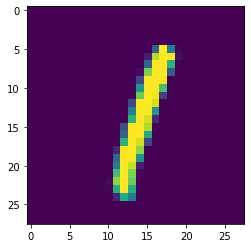

In [57]:
my_number = x_test[5]
plt.imshow(my_number.reshape(28,28))

In [58]:
model.predict_classes(my_number.reshape(1,28,28,1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1])